In [2]:
Problem Statement:
    
We have a cab trip dataset wherein details regarding customer_request_id, pick up point, driver id, Status, Request timestamp and Drop timestamp.
Based out of these features , I have cleaned the data and have applied basic EDA techniques to come to a broader conclusion

In [ ]:
Importing the required libraries

In [ ]:
1. Facts and Figures about our dataset(Understanding the data)

Read the csv into a dataframe(df) and print the first 5 rows

In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [67]:
df=pd.read_csv("Uber Request Data.csv")
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [68]:
len(df["Request id"].unique())

6745

In [ ]:
Show the number of rows and columns in the dataset

In [69]:
df.shape

(6745, 6)

In [ ]:
Show the number of NaNs in each columns

In [70]:
df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [ ]:
Show the % of NaNs in each columns

In [71]:
df.isnull().sum()/df.shape[0]*100 # df.shape[0] gives the number of rows

Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64

In [ ]:
Show the details ssuch as column names,dtypes,non-null count for the given data
Extracted Info:
Number of Rows: 6745
Number of Columns: 6
Dtype of each column based on the type of data it holds
There are 2 numerical(int and float) anf 4 objects column

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [ ]:
Finding out the statistical summary for both numerical and object columns in one place

In [73]:
df.describe(include="all")

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
count,6745.000000,6745,4095.000000,6745,6745,2831
unique,NaN,2,NaN,3,5618,2598
top,NaN,City,NaN,Trip Completed,11/7/2016 9:40,11/7/2016 13:00
freq,NaN,3507,NaN,2831,6,4
mean,3384.644922,NaN,149.501343,NaN,NaN,NaN
std,1955.099667,NaN,86.051994,NaN,NaN,NaN
min,1.000000,NaN,1.000000,NaN,NaN,NaN
25%,1691.000000,NaN,75.000000,NaN,NaN,NaN
50%,3387.000000,NaN,149.000000,NaN,NaN,NaN
75%,5080.000000,NaN,224.000000,NaN,NaN,NaN


In [ ]:
2. Cleaning/Handling the data

We see that for the column "Request timstamp", the format of DateTime is different for different sections of data. Some have it separated by "-" and some have it separated by "/".
Let us first replace the "/" with "-" to have uniformity and then convert the enite column to standard datatime format using "pd.to_datatime" function. Refer to lines 10,11 and 12.

In [74]:
df["Request timestamp"].value_counts()

11/7/2016 9:40         6
11/7/2016 17:57        6
11/7/2016 8:37         6
11/7/2016 19:02        6
11/7/2016 5:12         5
                      ..
14-07-2016 09:11:13    1
12/7/2016 7:01         1
11/7/2016 2:02         1
15-07-2016 14:05:38    1
14-07-2016 06:42:36    1
Name: Request timestamp, Length: 5618, dtype: int64

In [75]:
df["Request timestamp"]=df["Request timestamp"].astype(str)

In [76]:
df["Request timestamp"]=df["Request timestamp"].replace("/","-")

In [77]:
df["Request timestamp"]=pd.to_datetime(df["Request timestamp"],dayfirst=True)

In [ ]:
After doing the datatime conversion, if we pull the info again, we see that "Request timestamp" is converted to "datetime".

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 316.3+ KB


In [ ]:
Similarly convert "Drop timestamp" column from "object" to "datatime"

In [79]:
df["Drop timestamp"]=pd.to_datetime(df["Drop timestamp"],dayfirst=True)

In [ ]:
Pulling up the info, now we can see both "Request timestamp" and "Drop timestamp" are converted to datatime standard.

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [81]:
df["Drop timestamp"]

0      2016-07-11 13:00:00
1      2016-07-11 18:47:00
2      2016-07-12 09:58:00
3      2016-07-12 22:03:00
4      2016-07-13 09:25:47
               ...        
6740                   NaT
6741                   NaT
6742                   NaT
6743                   NaT
6744                   NaT
Name: Drop timestamp, Length: 6745, dtype: datetime64[ns]

In [ ]:
We now add 2 columns "req_hour"(which is Hour of the request during the day) and "req_day"(which is the day of the month) to determine and catogorise the load of cab service requests.

In [82]:
req_hour=df["Request timestamp"].dt.hour # Fetching the hour number from the request timestamp

In [83]:
df["req_hour"]=req_hour # Adding a new column "req_hour" from the hour number fetched from above.

In [84]:
req_day=df["Request timestamp"].dt.day # Fetching the day number from the request timestamp

In [85]:
df["req_day"]=req_day # Adding a new column "req_day" from the day number fetched from above

In [ ]:
3. Visualize and Analysis

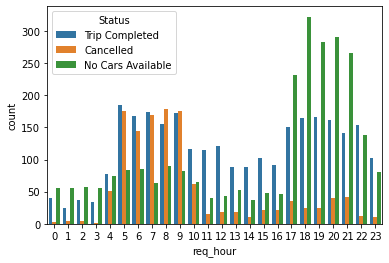

In [86]:
sns.countplot(x="req_hour",data=df,hue="Status")
plt.show()

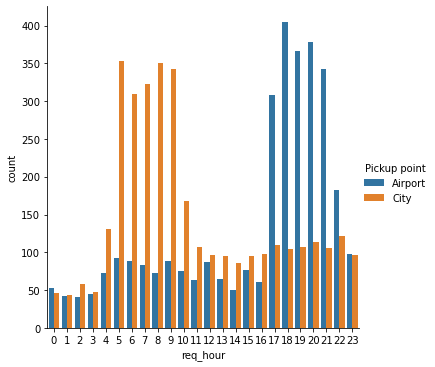

In [87]:
sns.catplot(x="req_hour",data=df,hue="Pickup point",kind="count")
plt.show()

In [ ]:
Plot of Status of the trip at different hours of the day and also pick up locations shows that,
1) Between hours 5AM-9AM, the load on cabs are high with almost equal amount of trips getting completed and cancelled.
2) Between hours 5PM-9PM, the load on cabs are significantly high. Hence, there is mismatch between cab demand and availabilty. Hence, we see more of "No cars Available Status".
3) Between hours 5AM-9AM, the users from city is significantly high.
4) Between hours 5PM-9PM, the users from Airport is significantly high.
Adding a new column Time_Slot to make categories of hours from the req_hour column

In [88]:
df["Time_Slot"]=0

In [89]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_Slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,0
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,0
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,0


In [ ]:
Hour Categories:
req_hour<5 as "Pre_Morning"
req_hour<10 as "Morning_Rush"
req_hour<17 as "Day_Time"
req_hour<22 as "Evening_Rush"
else "Late_Night"

In [90]:
j=0
for i in df["req_hour"]:
    if df.iloc[j,6]<5:
        df.iloc[j,8]="Pre_Morning"
    elif 5<=df.iloc[j,6]<10:
        df.iloc[j,8]="Morning_Rush"
        
    elif 10<=df.iloc[j,6]<17:
        df.iloc[j,8]="Day_Time"
        
    elif 17<=df.iloc[j,6]<22:
        df.iloc[j,8]="Evening_Rush"
    else:
        df.iloc[j,8]="Late_Night"
    j=j+1

In [91]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_Slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,Day_Time
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,Evening_Rush
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,Morning_Rush
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,Evening_Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning_Rush


In [ ]:
Hour Categories:
req_hour<5 as "Pre_Morning"
req_hour<10 as "Morning_Rush"
req_hour<17 as "Day_Time"
req_hour<22 as "Evening_Rush"
else "Late_Night"

In [92]:
df["Time_Slot"].value_counts()

Evening_Rush    2342
Morning_Rush    2103
Day_Time        1224
Pre_Morning      578
Late_Night       498
Name: Time_Slot, dtype: int64

In [ ]:
You see from the above value counts, the "Morning_Rush" and "Evening_Rush" are the hours with maximum load.

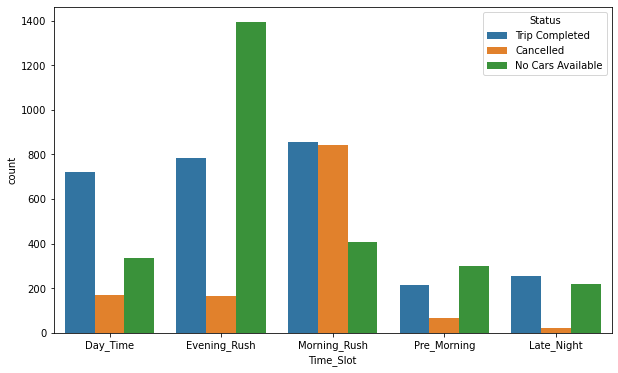

In [93]:
plt.figure(figsize=(10,6))
sns.countplot(x="Time_Slot",hue="Status",data=df)
plt.show()

In [94]:
df_morning_rush=df[df['Time_Slot']=='Morning_Rush']

<AxesSubplot:xlabel='Pickup point', ylabel='count'>

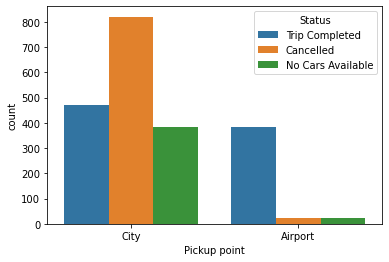

In [95]:
sns.countplot(x="Pickup point",hue="Status",data=df_morning_rush)

In [ ]:
Cancellation of cab as per the pickup location at morning rush hours

In [96]:
# Pickup point= Airport

df_airport_cancelled=df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport") & (df_morning_rush["Status"]=="Cancelled")]
len(df_airport_cancelled)

23

In [97]:
# Pickup point= City
df_city_cancelled=df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City") & (df_morning_rush["Status"]=="Cancelled")]
len(df_city_cancelled)

820

In [ ]:
Morning Rush- city

In [98]:
df_morning_rush[(df_morning_rush["Pickup point"]=="City")].shape[0]

1677

In [99]:
df_morning_rush[(df_morning_rush["Pickup point"]=="City") & (df_morning_rush["Status"]=="Cancelled")].shape[0]

820

In [100]:
df_morning_rush[(df_morning_rush["Pickup point"]=="City") & (df_morning_rush["Status"]=="Trip Completed")].shape[0]

472

In [101]:
df_morning_rush[(df_morning_rush["Pickup point"]=="City") & (df_morning_rush["Status"]=="No Cars Available")].shape[0]

385

In [ ]:
Morning Rush- Airport

In [102]:
df_morning_rush[(df_morning_rush["Pickup point"]=="Airport")].shape[0]

426

In [103]:
df_morning_rush[(df_morning_rush["Pickup point"]=="Airport") & (df_morning_rush["Status"]=="Cancelled")].shape[0]

23

In [104]:
df_morning_rush[(df_morning_rush["Pickup point"]=="Airport") & (df_morning_rush["Status"]=="Trip Completed")].shape[0]

382

In [105]:
df_morning_rush[(df_morning_rush["Pickup point"]=="Airport") & (df_morning_rush["Status"]=="No Cars Available")].shape[0]

21

In [ ]:
Evening Rush

In [106]:
df_evening_rush=df[df['Time_Slot']=='Evening_Rush']
df_evening_rush.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_Slot
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,Evening_Rush
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,Evening_Rush
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,21,13,Evening_Rush
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,17,15,Evening_Rush
15,3482,Airport,2.0,Trip Completed,2016-07-13 17:23:18,2016-07-13 18:20:51,17,13,Evening_Rush


In [107]:
df_city_cancelled=df_evening_rush[(df_evening_rush["Pickup point"]=="City") & (df_evening_rush["Status"]=="Cancelled")]

<AxesSubplot:xlabel='Pickup point', ylabel='count'>

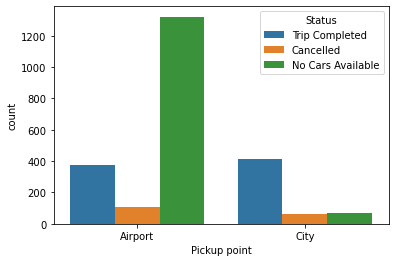

In [108]:
sns.countplot(x="Pickup point",hue="Status",data=df_evening_rush)

In [109]:
df_evening_rush["Status"].value_counts()

No Cars Available    1392
Trip Completed        784
Cancelled             166
Name: Status, dtype: int64

In [ ]:
Evening- Rush City

In [110]:
df_evening_rush[(df_evening_rush["Pickup point"]=="City")].shape[0]

542

In [111]:
df_evening_rush[(df_evening_rush["Pickup point"]=="City") & (df_evening_rush["Status"]=="Cancelled")].shape[0]

60

In [112]:
df_evening_rush[(df_evening_rush["Pickup point"]=="City") & (df_evening_rush["Status"]=="Trip Completed")].shape[0]

411

In [113]:
df_evening_rush[(df_evening_rush["Pickup point"]=="City") & (df_evening_rush["Status"]=="No Cars Available")].shape[0]

71

In [ ]:
Evening- Rush Airport

In [114]:
df_evening_rush[(df_evening_rush["Pickup point"]=="Airport")].shape[0]

1800

In [115]:
df_evening_rush[(df_evening_rush["Pickup point"]=="Airport") & (df_evening_rush["Status"]=="Cancelled")].shape[0]

106

In [116]:
df_evening_rush[(df_evening_rush["Pickup point"]=="Airport") & (df_evening_rush["Status"]=="Trip Completed")].shape[0]

373

In [117]:
df_evening_rush[(df_evening_rush["Pickup point"]=="Airport") & (df_evening_rush["Status"]=="No Cars Available")].shape[0]

1321

In [ ]:
Pie chart

In [118]:
df_morning_city=df[(df["Pickup point"]=="City")&(df["Time_Slot"]=="Morning_Rush")]

In [119]:
df_morning_city_count=pd.DataFrame(df_morning_city["Status"].value_counts())

In [120]:
df_morning_city_count

,Status
Cancelled,820
Trip Completed,472
No Cars Available,385


In [121]:
df_morning_city_count["Status"].values

array([820, 472, 385], dtype=int64)

In [122]:
df_morning_city_count["Status"].index

Index(['Cancelled', 'Trip Completed', 'No Cars Available'], dtype='object')

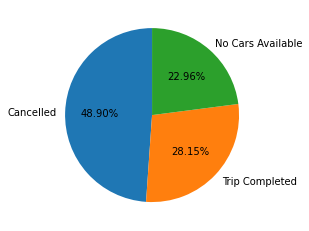

In [123]:
fig,ax=plt.subplots()
ax.pie(df_morning_city_count["Status"].values,labels=df_morning_city_count["Status"].index,
      autopct="%.2f%%",startangle=90)
plt.show()

In [124]:
df_evening_airport=df[(df["Pickup point"]=="Airport")&(df["Time_Slot"]=="Evening_Rush")]
df_evening_airport_count=pd.DataFrame(df_evening_airport["Status"].value_counts())
df_evening_airport_count

,Status
No Cars Available,1321
Trip Completed,373
Cancelled,106


In [125]:
df_evening_airport_count["Status"].values

array([1321,  373,  106], dtype=int64)

In [126]:
df_evening_airport_count["Status"].index

Index(['No Cars Available', 'Trip Completed', 'Cancelled'], dtype='object')

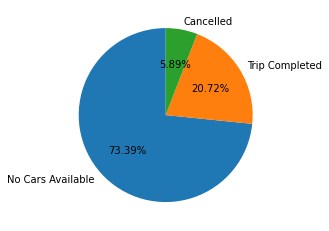

In [127]:
fig,ax=plt.subplots()
ax.pie(df_evening_airport_count["Status"].values,labels=df_evening_airport_count["Status"].index,
      autopct="%.2f%%",startangle=90)
plt.show()

In [ ]:
Key Take Aways
1) We understood the dataset with the number of user requests were done and the number of columns(6745,6) along with other facts such as number/percentage of NaNs in each columns and format of dataTime in the request and drop timestamp columns.
2) We standardised format of dataTime in the request and drop timestamp columns.
3) Figured a logical reason as to why the NaNs in Driver_id and drop timestamp columns should be ignored.
4) Extracted the day number and hour from the request timestamp column to perform a deeper analysis.
5) Between hours 5AM-9AM, the load on cabs are high with almost equal amount of trips getting completed and cancelled.
6) Between hours 5PM-9PM, the load on cabs are significantly high. Hence, there is mismatch between cab demand and availabilty. Hence, we see more of "No cars Available Status".
7) Between hours 5AM-9AM, the users from city is significantly high.
8) Between hours 5PM-9PM, the users from Airport is significantly high.
9) The "Morning_Rush" and "Evening_Rush" are the hours with maximum load(i.e more number of users requesting cab services).
10) We also saw the load during "Morning_rush" and "Evening_Rush" from both pick-up points "City" and "Airport".
11) During the evening rush hour, we saw a significant number of No CARS AVAILABLE status for the trip bookings from "Airport".